In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

In [2]:
# Importing the dataset
pima = pd.read_csv('/content/diabetes.csv')
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#print shape of data
pima.shape

(768, 9)

In [4]:
#print datatypes
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
#check if any null values present in dataset
pima.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#describing the data
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#printing count of values in Outcome column
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0, 0.5, 'Number of People')

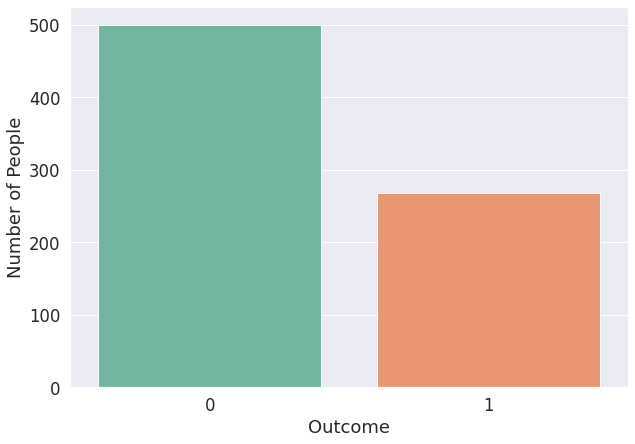

In [8]:
#plotting bargraph
plt.figure(figsize=(10,7))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Outcome', data=pima, palette="Set2")
plt.ylabel('Number of People')

In [9]:
#importing necessary models
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

In [10]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X = pima.drop('Outcome', axis  = 1)
y = pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)

In [11]:
#building the naive bayes model
nbModel = GaussianNB()

In [12]:
#fitting our training data to the model
nbModel.fit(X_train, y_train)

GaussianNB()

In [13]:
#predicting output for testing data
nb_y_pred = nbModel.predict(X_test)

In [14]:
#evaluating model using confusion matrix
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion

array([[128,  22],
       [ 34,  47]])

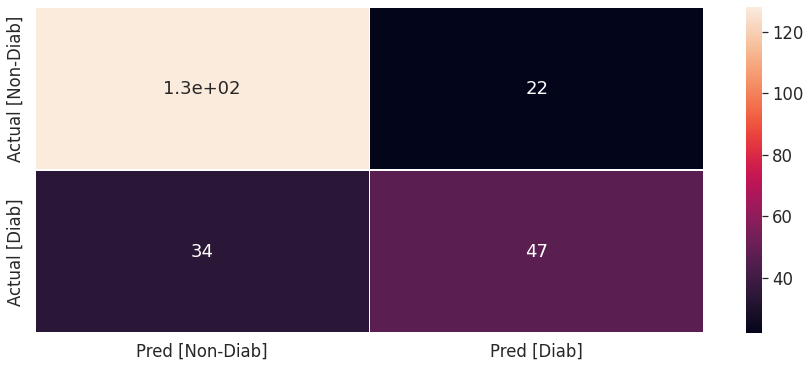

In [15]:
#plotting confusion matrix
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [16]:
#print accuracy of the model
print('Accuracy of Naive Bayes Classifier is: ', nbModel.score(X_test,y_test) * 100,'%')

Accuracy of Naive Bayes Classifier is:  75.75757575757575 %


In [17]:
#printing classification report
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.68      0.58      0.63        81

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.76      0.75       231

